# Introduction

We have a data which classified if Customer can have a Loan or not according to features in it. We will try to use this data to create a model which tries predict if a Customer has this Loan or not. 

The following learning algorithms are used:
- Logistic Regression
- K Nearest Neighbors 
- Support Vector Machine
- Naive Bayes
- Random Forest

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Data Loading

In [6]:
df_train = pd.read_csv("../../data/banking/train.csv", sep=';')
df_test = pd.read_csv("../../data/banking/test.csv", sep=';')

In [7]:
# First 10 rows of the training dataset
df_train.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


In [8]:
df_train.shape

(45211, 17)

# Data Preprocessing

Mapping data to convert values 'yes' and 'no' to 1 and 0, respectively.

In [9]:
df_train.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [10]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

column_trans = ColumnTransformer(
     transformers=[('cat', OneHotEncoder(sparse_output=False, drop='first'), ['default', 'housing', 'loan', 'y'])], 
     remainder='passthrough',  
     verbose_feature_names_out=False)

column_trans.set_output(transform='pandas')

df_temp = column_trans.fit_transform(df_train)

df_temp.head()

,default_yes,housing_yes,loan_yes,y_yes,age,job,marital,education,balance,contact,day,month,duration,campaign,pdays,previous,poutcome
0,0.0,1.0,0.0,0.0,58,management,married,tertiary,2143,unknown,5,may,261,1,-1,0,unknown
1,0.0,1.0,0.0,0.0,44,technician,single,secondary,29,unknown,5,may,151,1,-1,0,unknown
2,0.0,1.0,1.0,0.0,33,entrepreneur,married,secondary,2,unknown,5,may,76,1,-1,0,unknown
3,0.0,1.0,0.0,0.0,47,blue-collar,married,unknown,1506,unknown,5,may,92,1,-1,0,unknown
4,0.0,0.0,0.0,0.0,33,unknown,single,unknown,1,unknown,5,may,198,1,-1,0,unknown


In [11]:
df_temp.describe()

,default_yes,housing_yes,loan_yes,y_yes,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,0.018027,0.555838,0.160226,0.116985,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,0.133049,0.496878,0.366820,0.321406,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,0.000000,0.000000,0.000000,0.000000,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,0.000000,1.000000,0.000000,0.000000,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,0.000000,1.000000,0.000000,0.000000,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [12]:
class columnDropperTransformer():
    def __init__(self,columns):
        self.columns=columns

    def transform(self,X,y=None):
        return X.drop(self.columns,axis=1)

    def fit(self, X, y=None):
        return self 

In [13]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler

# pipeline
pipeline = Pipeline([
    ("columnTransformer", column_trans),
    ("columnDropper", columnDropperTransformer(['job', 'marital', 'education','contact', 'month', 'poutcome']))
])

# apply the pipeline to dataframe
df_train = pipeline.fit_transform(df_train)


In [14]:
df_train.shape

(45211, 11)

In [15]:
# df = df.drop(columns = ['job', 'marital', 'education','contact', 'month', 'poutcome'])
df_train.head()

,default_yes,housing_yes,loan_yes,y_yes,age,balance,day,duration,campaign,pdays,previous
0,0.0,1.0,0.0,0.0,58,2143,5,261,1,-1,0
1,0.0,1.0,0.0,0.0,44,29,5,151,1,-1,0
2,0.0,1.0,1.0,0.0,33,2,5,76,1,-1,0
3,0.0,1.0,0.0,0.0,47,1506,5,92,1,-1,0
4,0.0,0.0,0.0,0.0,33,1,5,198,1,-1,0


In [16]:
# apply the pipeline to dataframe
df_test = pipeline.transform(df_test)


## Creating data and response matrices

In [17]:
# Target matrix, response matrix
y_train = df_train.y_yes.values

# Data matrix
X_train = df_train.drop(['y_yes'], axis = 1)

# Target matrix, response matrix
y_test = df_test.y_yes.values

# Data matrix
X_test = df_test.drop(['y_yes'], axis = 1)

cols = X_train.columns

In [18]:
y_train

array([0., 0., 0., ..., 1., 0., 0.])

In [19]:
X_train.head(10)

,default_yes,housing_yes,loan_yes,age,balance,day,duration,campaign,pdays,previous
0,0.0,1.0,0.0,58,2143,5,261,1,-1,0
1,0.0,1.0,0.0,44,29,5,151,1,-1,0
2,0.0,1.0,1.0,33,2,5,76,1,-1,0
3,0.0,1.0,0.0,47,1506,5,92,1,-1,0
4,0.0,0.0,0.0,33,1,5,198,1,-1,0
5,0.0,1.0,0.0,35,231,5,139,1,-1,0
6,0.0,1.0,1.0,28,447,5,217,1,-1,0
7,1.0,1.0,0.0,42,2,5,380,1,-1,0
8,0.0,1.0,0.0,58,121,5,50,1,-1,0
9,0.0,1.0,0.0,43,593,5,55,1,-1,0


## Data Normalization

In [20]:
# # Normalize
# X_train = (X_train - np.min(X_train)) / (np.max(X_train) - np.min(X_train))

In [21]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
print(scaler.data_max_)
# print(scaler.transform([[2, 2]]))

[1.00000e+00 1.00000e+00 1.00000e+00 9.50000e+01 1.02127e+05 3.10000e+01
 4.91800e+03 6.30000e+01 8.71000e+02 2.75000e+02]


In [22]:
X_train

array([[0.        , 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.06451613, 0.21215596,
        0.01090909],
       [0.        , 0.        , 0.        , ..., 0.0483871 , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.01612903, 0.21674312,
        0.04      ]])

In [23]:
X_train = pd.DataFrame(X_train, columns = cols)
X_train.head()

,default_yes,housing_yes,loan_yes,age,balance,day,duration,campaign,pdays,previous
0,0.0,1.0,0.0,0.519481,0.092259,0.133333,0.053070,0.0,0.0,0.0
1,0.0,1.0,0.0,0.337662,0.073067,0.133333,0.030704,0.0,0.0,0.0
2,0.0,1.0,1.0,0.194805,0.072822,0.133333,0.015453,0.0,0.0,0.0
3,0.0,1.0,0.0,0.376623,0.086476,0.133333,0.018707,0.0,0.0,0.0
4,0.0,0.0,0.0,0.194805,0.072812,0.133333,0.040260,0.0,0.0,0.0


In [24]:
X_train.describe()

,default_yes,housing_yes,loan_yes,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,0.018027,0.555838,0.160226,0.297873,0.085171,0.493547,0.052494,0.028449,0.047245,0.002110
std,0.133049,0.496878,0.366820,0.137906,0.027643,0.277416,0.052364,0.049968,0.114827,0.008376
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.194805,0.073457,0.233333,0.020943,0.000000,0.000000,0.000000
50%,0.000000,1.000000,0.000000,0.272727,0.076871,0.500000,0.036600,0.016129,0.000000,0.000000
75%,0.000000,1.000000,0.000000,0.389610,0.085768,0.666667,0.064864,0.032258,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [25]:
X_test = pd.DataFrame(X_test, columns = cols)
X_test.head()

,default_yes,housing_yes,loan_yes,age,balance,day,duration,campaign,pdays,previous
0,0.0,0.0,0.0,0.155844,0.089027,0.600000,0.016063,0.000000,0.000000,0.000000
1,0.0,1.0,1.0,0.194805,0.116282,0.333333,0.044734,0.000000,0.389908,0.014545
2,0.0,1.0,0.0,0.220779,0.085060,0.500000,0.037617,0.000000,0.379587,0.003636
3,0.0,1.0,1.0,0.155844,0.086204,0.066667,0.040464,0.048387,0.000000,0.000000
4,0.0,1.0,0.0,0.532468,0.072803,0.133333,0.045954,0.000000,0.000000,0.000000


In [26]:
# **We will split our data. 80% of our data will be train data and 20% of it will be test data.**
# x_train, x_test, y_train, y_test = train_test_split(x,
#                                                     y,
#                                                     test_size = 0.2,
#                                                     random_state=0,
#                                                     stratify = y)

## Logistic Regression from Scratch

In [27]:
# %load logistic_regression.py
#initialize
def initialize(dimension):

    weight = np.full((dimension,1),0.01)
    bias = 0.0
    return weight,bias
    
def sigmoid(z):

    y_head = 1/(1+ np.exp(-z))
    return y_head

def forwardBackward(weight,bias,x_train,y_train):
    # Forward

    y_head = sigmoid(np.dot(weight.T,x_train) + bias)
    loss = -(y_train*np.log(y_head) + (1-y_train)*np.log(1-y_head))
    cost = np.sum(loss) / x_train.shape[1]

    # Backward
    derivative_weight = np.dot(x_train,((y_head-y_train).T))/x_train.shape[1]
    derivative_bias = np.sum(y_head-y_train)/x_train.shape[1]
    gradients = {"Derivative Weight" : derivative_weight, "Derivative Bias" : derivative_bias}

    return cost,gradients

def update(weight,bias,x_train,y_train, learningRate, iteration) :
    costList = []
    index = []

    #for each iteration, update weight and bias values
    for i in range(iteration):
        cost,gradients = forwardBackward(weight,bias,x_train,y_train)
        weight = weight - learningRate * gradients["Derivative Weight"]
        bias = bias - learningRate * gradients["Derivative Bias"]

        costList.append(cost)
        index.append(i)

    parameters = {"weight": weight,"bias": bias}

    print("iteration:",iteration)
    print("cost:",cost)

    plt.plot(index,costList)
    plt.xlabel("Number of Iteration")
    plt.ylabel("Cost")
    plt.show()

    return parameters, gradients

def predict(weight,bias,x_test):
    z = np.dot(weight.T,x_test) + bias
    y_head = sigmoid(z)

    y_prediction = np.zeros((1,x_test.shape[1]))

    for i in range(y_head.shape[1]):
        if y_head[0,i] <= 0.5:
            y_prediction[0,i] = 0
        else:
            y_prediction[0,i] = 1
    return y_prediction

def logistic_regression(x_train,y_train,x_test,y_test,learningRate,iteration):
    dimension = x_train.shape[0]
    weight,bias = initialize(dimension)

    parameters, gradients = update(weight,bias,x_train,y_train,learningRate,iteration)

    y_prediction = predict(parameters["weight"],parameters["bias"], x_test)

    print("Manual Test Accuracy: {:.2f}%".format((100 - np.mean(np.abs(y_prediction - y_test))*100)))

iteration: 100
cost: 0.3432048039209825


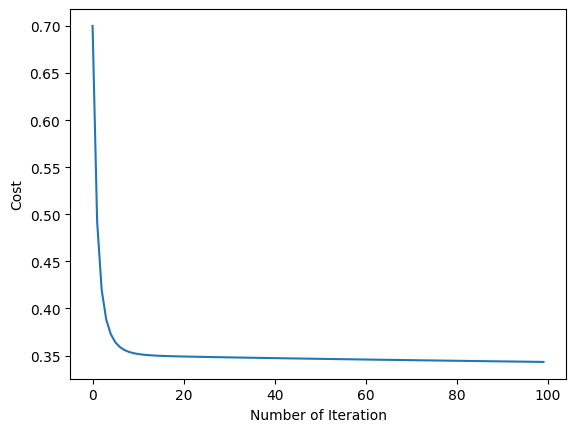

Manual Test Accuracy: 88.48%


In [28]:
#transpose matrices
x_train = X_train.T
y_train = y_train.T
x_test = X_test.T
y_test = y_test.T

logistic_regression(x_train,
                    y_train,
                    x_test,
                    y_test,
                    learningRate = 1,
                    iteration = 100)

# Using Scikit-Learn

## Logistic Regression 

In [29]:
accuracies = {}

lr = LogisticRegression()
lr.fit(X_train,y_train)

acc_train = lr.score(X_train, y_train)*100
acc_test = lr.score(X_test, y_test)*100

#:accuracies['Logistic Regression'] = acc


print("Train/Test Accuracy {:.2f}/{:.2f}%".format(acc_train, acc_test))

Train/Test Accuracy 88.94/89.01%


In [30]:
from sklearn.metrics import classification_report
y_true = y_test
y_pred = lr.predict(X_test)
target_names = ['class 0', 'class 1']
print(classification_report(y_true, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.90      0.98      0.94      4000
     class 1       0.58      0.17      0.27       521

    accuracy                           0.89      4521
   macro avg       0.74      0.58      0.60      4521
weighted avg       0.86      0.89      0.86      4521



## K-Nearest Neighbour (KNN)

In [31]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 2)  # n_neighbors means k
knn.fit(X_train, y_train)
prediction = knn.predict(X_test)

print("{} KNN Score: {:.2f}%".format(2, knn.score(X_test, y_test)*100))

2 KNN Score: 92.48%


## Support Vector Machine (SVM)

In [32]:
from sklearn.svm import SVC

svm = SVC(random_state = 1)
svm.fit(X_train, y_train)

acc = svm.score(X_test,y_test)*100
accuracies['SVM'] = acc
print("Test Accuracy of SVM Algorithm: {:.2f}%".format(acc))

Test Accuracy of SVM Algorithm: 88.50%


## Naive Bayes

In [33]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)

acc = nb.score(X_test,y_test)*100
accuracies['Naive Bayes'] = acc
print("Accuracy of Naive Bayes: {:.2f}%".format(acc))

Accuracy of Naive Bayes: 86.07%


## Random Forest

In [34]:
# Random Forest Classification
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 1000, random_state = 1)
rf.fit(X_train, y_train)

acc = rf.score(X_test, y_test)*100
accuracies['Random Forest'] = acc
print("Random Forest Algorithm Accuracy Score : {:.2f}%".format(acc))

Random Forest Algorithm Accuracy Score : 100.00%


# Comparing Models

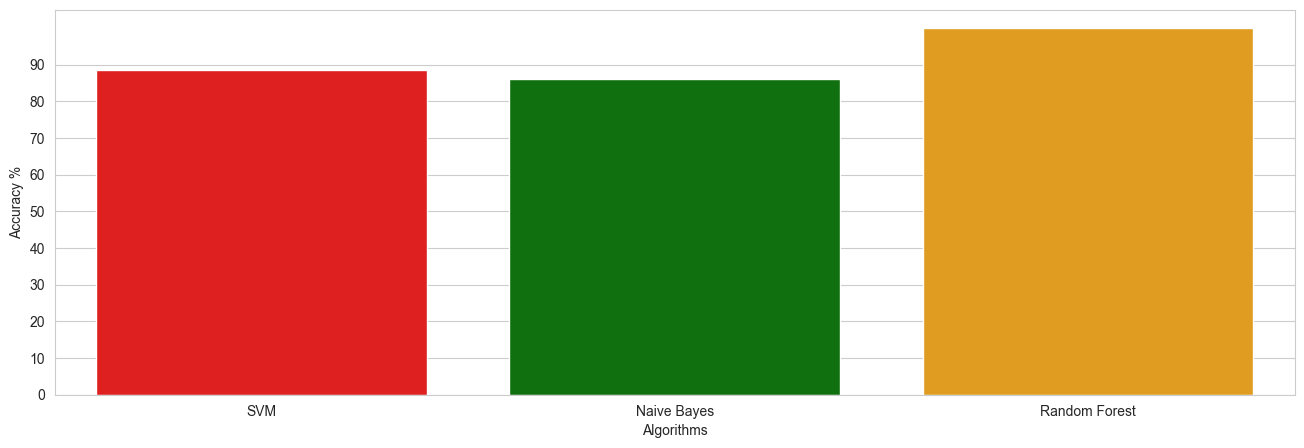

In [35]:
colors = ["Red", "green", "orange", "magenta","purple"]

sns.set_style("whitegrid")
plt.figure(figsize=(16,5))
plt.yticks(np.arange(0,100,10))
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette=colors)
plt.show()

# Confusion Matrix

In [36]:
# Predicted values
y_head_lr = lr.predict(X_test)
knn3 = KNeighborsClassifier(n_neighbors = 3)
knn3.fit(X_train, y_train)
y_head_knn = knn3.predict(X_test)
y_head_svm = svm.predict(X_test)
y_head_nb = nb.predict(X_test)
y_head_rf = rf.predict(X_test)

In [37]:
from sklearn.metrics import confusion_matrix

cm_lr = confusion_matrix(y_test,y_head_lr)
cm_knn = confusion_matrix(y_test,y_head_knn)
cm_svm = confusion_matrix(y_test,y_head_svm)
cm_nb = confusion_matrix(y_test,y_head_nb)
cm_rf = confusion_matrix(y_test,y_head_rf)

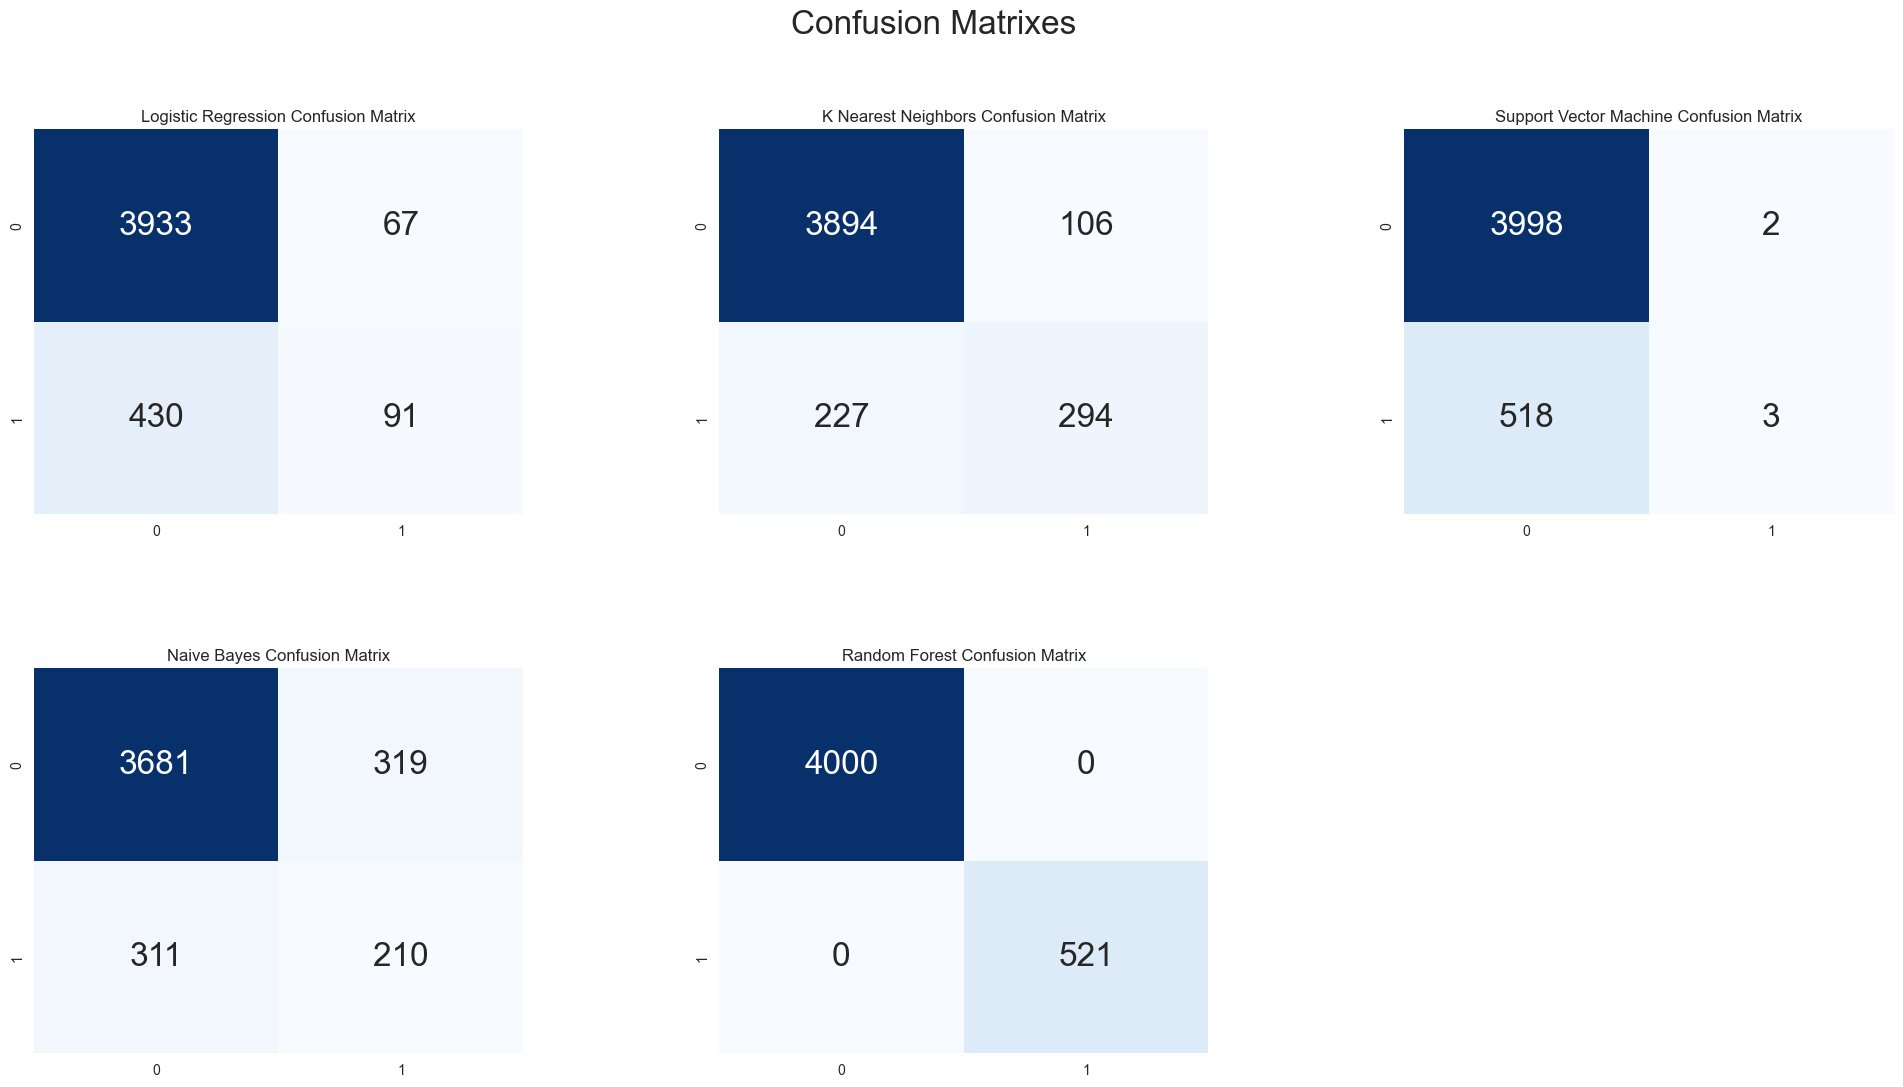

In [38]:
plt.figure(figsize=(24,12))

plt.suptitle("Confusion Matrixes",fontsize=24)
plt.subplots_adjust(wspace = 0.4, hspace= 0.4)

plt.subplot(2,3,1)
plt.title("Logistic Regression Confusion Matrix")
sns.heatmap(cm_lr,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,2)
plt.title("K Nearest Neighbors Confusion Matrix")
sns.heatmap(cm_knn,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,3)
plt.title("Support Vector Machine Confusion Matrix")
sns.heatmap(cm_svm,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,4)
plt.title("Naive Bayes Confusion Matrix")
sns.heatmap(cm_nb,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,5)
plt.title("Random Forest Confusion Matrix")
sns.heatmap(cm_rf,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.show()